# **E1 - Neural Networks with PyTorch**

## **Tensors**

PyTorch is an open-source deep learning framework developed by Facebook. It is primarily used for building and training neural networks and is known for its ease of use, flexibility, and dynamic computational graph system.

PyTorch is a complete library that has the capability to train a deep learning model as well as run a model in inference mode, and supports using GPU for faster training and inference. It is a platform that we cannot ignore.

### Task 0: Make sure you have PyTorch correctly installed

In [4]:
# Import libraries
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn

In [5]:
print(torch.__version__)

2.2.2+cpu


### Task 1: Create Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.

In [ ]:
# Initialize Tensors
# from data:
data = [[5, 1, 7, 9],[4, 12, 19, 0]]
x_data = torch.tensor(data)

# from a numpy array:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# from another tensor:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data

# with random or constant values:
shape = (4,3,)    # shape is a tuple of tensor dimensions
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

**Questions:**
1. Print all tensors to explore different initialization possibilities
2. What are the attributes of a tensor? *(Hint: print the shape and the data type of one of the tensors)*

**Solution**

In [ ]:
#Solution Question 1:
print(f"Data Tensor: \n {x_data} \n")
print(f"NumPy Array Tensor: \n {x_np} \n")
print(f"Ones Tensor: \n {x_ones} \n")
print(f"Random Tensor: \n {x_rand} \n")
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

In [ ]:
#Solution Question 2:
print(f"Shape of tensor: {rand_tensor.shape}")
print(f"Datatype of tensor: {rand_tensor.dtype}")

Additional attribute of each tensor is the device on which it is stored.

In [ ]:
print(f"Tensor is stored on: {rand_tensor.device}")

In [ ]:
# There are two ways to specify the device of the tensor
# You can switch the device of an already existing tensor by using the .to("[cpu|cuda]") command
if torch.cuda.is_available():
    rand_tensor = rand_tensor.to("cuda")
    print(f"Tensor is stored now on: {rand_tensor.device}")

# Or specify the device while creating the tensor
if torch.cuda.is_available():
    gpu_tensor = torch.tensor([3,4], device='cuda')
    print(f"New tensor is stored on: {gpu_tensor.device}")

## Task 2: Operations on Tensors

In [ ]:
# Indexing and Slicing
rand_tensor = torch.rand(5,5)
print(rand_tensor)

**Questions:**
1. Print first row or column of rand_tensor. Print last row or column. Change every value in middle column to be equal to 0.

In [ ]:
# Joining tensors
tensor_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_b = torch.tensor([[7, 8, 9], [10, 11, 12]])

# You can join tensors with torch.cat
join_cat = torch.cat((tensor_a, tensor_b), dim=0)
# or with torch.stack
join_stack = torch.stack((tensor_a, tensor_b), dim=0)

print(f"Concatenated tensor: \n {join_cat} \n")
print(f"Stacked tensor: \n {join_stack} \n")

2. What is the difference between torch.cat and torch.stack?

In [ ]:
# Arithmetic operations

tensor = torch.rand(3,4)
tensor_trans = tensor.T
print(f"Tensor: \n {tensor} \n")
print(f"Transpose tensor: \n {tensor_trans} \n")

# Matrix multiplication between two tensors
product1 = tensor @ tensor_trans
print(f"Product 1: \n {product1} \n")
product2 = tensor.matmul(tensor_trans)
print(f"Product 2: \n {product2} \n")
product3 = torch.rand_like(product1)
torch.matmul(tensor, tensor_trans, out=product3)

# Element-wise product
el_product1 = tensor * tensor
print(f"Element product 1: \n {el_product1} \n")
el_product2 = tensor.mul(tensor)
print(f"Element product 2: \n {el_product2} \n")
el_product3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=el_product3)

**Solutions**

In [ ]:
#Solution for Question 1
print(f"First row: {rand_tensor[0]}")
print(f"First column: {rand_tensor[:, 0]}")
print(f"Last column: {rand_tensor[..., -1]}")
rand_tensor[:,2] = 0
print(rand_tensor)

Solution for Question 2
- torch.cat merges tensors without increasing the number of dimensions, while torch.stack adds a new dimension (thus increasing the rank of the tensor).
- torch.cat requires the tensors to have matching sizes in all dimensions except the one you're concatenating along, whereas torch.stack expects all input tensors to have the exact same 

## **Single Perceptrons**

Let's create a sample dataset for binary classification of email data with two features (e.g. length of the subject line and number of suspicious words)

Features: [length of subject, number of suspicious words]

Labels: 1 for spam, -1 for not spam

In [24]:
np.random.seed(42) # Seed for reproducibility

emails = np.array([
    [50, 10],
    [10, 2],
    [70, 12], 
    [5, 1],
    [40, 8],
    [8, 0],
    [20, 1],
    [30, 0],
    [20, 10],
])

labels = np.array([1, -1, 1, -1, 1, -1, -1, -1, 1])

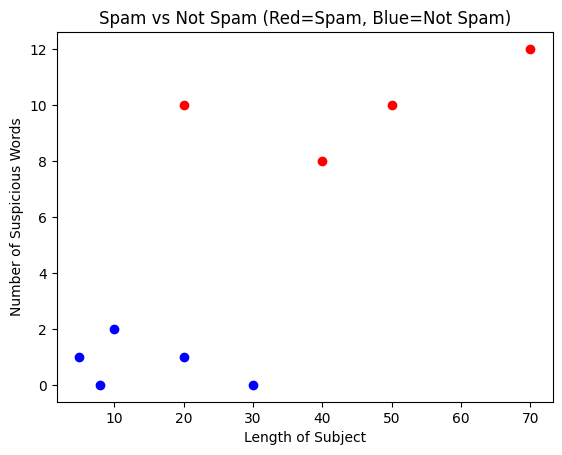

In [25]:
# Visualize the data
for email, label in zip(emails, labels):
    color = 'red' if label == 1 else 'blue'
    plt.scatter(email[0], email[1], color=color)
plt.xlabel('Length of Subject')
plt.ylabel('Number of Suspicious Words')
plt.title('Spam vs Not Spam (Red=Spam, Blue=Not Spam)')
plt.show()

### Task 3: Create Single Perceptron Algorithm

In [45]:
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        while True:
            errors = 0   
            for idx, x_i in enumerate(X):
                #sign(<w, xi> + b)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)
                
                # Check if there is an error in prediction
                if y_predicted != y[idx]:
                    # Update the weights and bias
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]
                    errors += 1
            # If no errors, break the loop
            if errors == 0:
                break
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

**Questions:**
    
1. Write the algorithm for Single Perceptron *(Hint: look in the lecture for the pseudo-code)*

### Task 4: Training and Testing the Perceptron

In [46]:
p = Perceptron(learning_rate=0.1)
p.fit(emails, labels)

# Make predictions
predictions = p.predict(emails)
print("Predictions:", predictions)
print("True labels:", labels)

# Check the accuracy
accuracy = np.mean(predictions == labels)
print(f"Accuracy: {accuracy * 100}%")


Predictions: [ 1. -1.  1. -1.  1. -1. -1. -1.  1.]
True labels: [ 1 -1  1 -1  1 -1 -1 -1  1]
Accuracy: 100.0%


**Questions:**

2. Until when does the perceptron learn? What stop criteria did you use? Rewrite to use number of iterations.

3. Play around with the number of iterations and the learning rate

In [50]:
######################
#    Solution Q2     #
######################

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias to zero
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters): 
            for idx, x_i in enumerate(X):
                #sign(<w, xi> + b)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)
                
                # Check if there is an error in prediction
                if y_predicted != y[idx]:
                    # Update the weights and bias
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)

p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(emails, labels)

# Make predictions
predictions = p.predict(emails)
print("Predictions:", predictions)
print("True labels:", labels)

# Check the accuracy
accuracy = np.mean(predictions == labels)
print(f"Accuracy: {accuracy * 100}%")

Predictions: [ 1.  1.  1.  1.  1. -1. -1. -1.  1.]
True labels: [ 1 -1  1 -1  1 -1 -1 -1  1]
Accuracy: 77.77777777777779%


## **Neural Networks**

### Task 5: Loading Dataset

Download dataset from Opal and save it to the same folder as the notebook.

Dataset contains information about Breast Cancer. (ref.: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

Attributes are: ID, diagnosis, 30 real-valued input features. The diagnosis can be M = malignant or B = benign.
- ignore column 1 = ID
- set the target to column 2 = diagnosis

In [36]:
#Load the dataset
dataset = np.loadtxt('/projects/p_scads_llm_secrets/datasets/wdbc.data', delimiter=',', dtype=str) #change name to path of the file, if needed
print(dataset[:3])

X = dataset[:, 2:].astype(np.float32)
y = dataset[:, 1]
y = np.where(y == 'M', 1, 0).astype(np.float32) # Convert diagnosis (M/B) to numerical labels (e.g., M -> 1, B -> 0)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

print(X[:3])
print(y[:3])

[['842302' 'M' '17.99' '10.38' '122.8' '1001' '0.1184' '0.2776' '0.3001'
  '0.1471' '0.2419' '0.07871' '1.095' '0.9053' '8.589' '153.4' '0.006399'
  '0.04904' '0.05373' '0.01587' '0.03003' '0.006193' '25.38' '17.33'
  '184.6' '2019' '0.1622' '0.6656' '0.7119' '0.2654' '0.4601' '0.1189']
 ['842517' 'M' '20.57' '17.77' '132.9' '1326' '0.08474' '0.07864'
  '0.0869' '0.07017' '0.1812' '0.05667' '0.5435' '0.7339' '3.398' '74.08'
  '0.005225' '0.01308' '0.0186' '0.0134' '0.01389' '0.003532' '24.99'
  '23.41' '158.8' '1956' '0.1238' '0.1866' '0.2416' '0.186' '0.275'
  '0.08902']
 ['84300903' 'M' '19.69' '21.25' '130' '1203' '0.1096' '0.1599' '0.1974'
  '0.1279' '0.2069' '0.05999' '0.7456' '0.7869' '4.585' '94.03' '0.00615'
  '0.04006' '0.03832' '0.02058' '0.0225' '0.004571' '23.57' '25.53'
  '152.5' '1709' '0.1444' '0.4245' '0.4504' '0.243' '0.3613' '0.08758']]
tensor([[1.7990e+01, 1.0380e+01, 1.2280e+02, 1.0010e+03, 1.1840e-01, 2.7760e-01,
         3.0010e-01, 1.4710e-01, 2.4190e-01, 7.8710e

### Task 6: Build A Multilayer Perceptron Model

The network model is just a few layers of fully-connected perceptrons.
In this particular model, the dataset has 12 inputs or predictors and the output is a single value of 0 or 1. Therefore, the network model should have 12 inputs (at the first layer) and 1 output (at the last layer). This is a network with 3 fully-connected layers. Each layer is created in PyTorch using the nn.Linear(x, y) syntax which the first argument is the number of input to the layer and the second is the number of output. Between each layer, a rectified linear activation is used, but at the output, sigmoid activation is applied such that the output value is between 0 and 1. This is a typical network. A deep learning model is to have a lot of such layers in a model.

In [8]:
model = nn.Sequential(
    nn.Linear(30, 12),  # 30 input features, 12 hidden units
    nn.ReLU(),
    nn.Linear(12, 8),   # 12 input to 8 hidden units
    nn.ReLU(), 
    nn.Linear(8, 1),    # 8 input units to 1 output (binary classification)
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=30, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


**Questions:**
1. Try to add another layer that outputs 20 values after the first Linear layer above. What should you change?

**Solution**

In [9]:
model = nn.Sequential(
    nn.Linear(30, 20),
    nn.ReLU(),
    nn.Linear(20, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=30, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
  (7): Sigmoid()
)


### Task 7: Train a PyTorch Model

Building a neural network in PyTorch does not tell how you should train the model for a particular job. In fact, there are many variations in this aspect as described by the hyperparameters. In PyTorch, or all deep learning models in general, you need to decide the following on how to train a model:

- What is the dataset, specifically how the input and target looks like
- What is the loss function to evaluate the goodness of fit of the model to the data
- What is the optimization algorithm to train the model, and the parameters to the optimization algorithm such as learning rate and number of iterations to train

Since it is a binary classification problem, the loss function should be binary cross entropy. It means that the target of the model output is 0 or 1 for the classification result. But in reality the model may output anything in between. The closer it is to the target value, the better (i.e., lower loss).

Gradient descent is the algorithm to optimize neural networks. There are many variations of gradient descent and Adam is one of the most used.

Implementing all the above, the following is the code of the training process:


In [45]:
loss_fn = nn.BCELoss() # binary cross-entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):
    model.train()
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #print(f'Finished epoch {epoch}, latest loss {loss}')

The for-loop above is to get a batch of data and feed into the model. Then observe the model’s output and calculate the loss function. Based on the loss function, the optimizer will fine-tune the model for one step, so it can match better to the training data. After a number of update steps, the model should be close enough to the training data that it can predict the target at a high accuracy.

*Play around with the values of the number of epochs and the batch size*

**Questions:**
1. How does the loss change with different number of epochs *(e.g., 10, 50, 100, 200)*
2. What is the influence of the batch size? What happens if you remove it?

**Solutions**

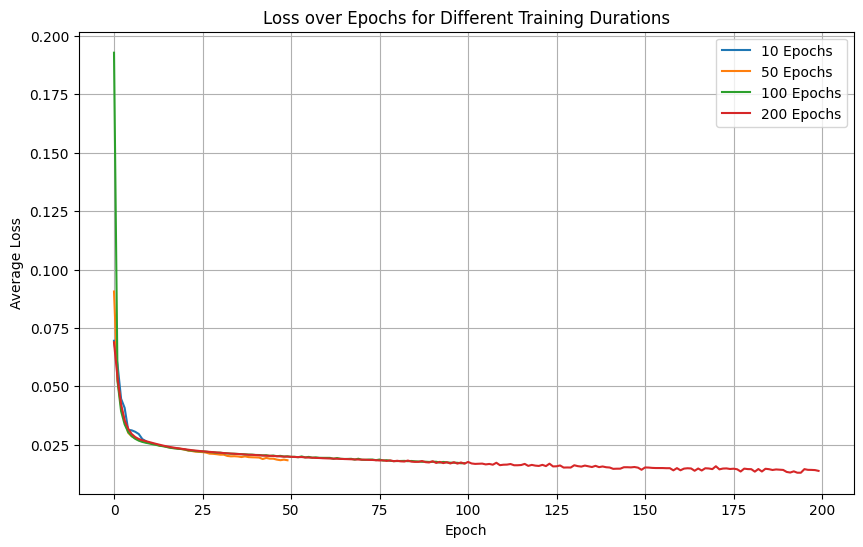

In [11]:
#Solution for Question 1:
def train_model(n_epochs, batch_size=None):
    losses = []
    for epoch in range(n_epochs):
        epoch_loss = 0.0
        for i in range(0, len(X), batch_size if batch_size else len(X)):
            Xbatch = X[i:i + (batch_size if batch_size else len(X))]
            ybatch = y[i:i + (batch_size if batch_size else len(X))]
            
            # Forward pass
            y_pred = model(Xbatch)
            loss = loss_fn(y_pred, ybatch)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(X)
        losses.append(avg_loss)
    
    return losses

epoch_list = [10, 50, 100, 200]
batch_size = 10  # Example batch size

# Initialize a dictionary to store the loss results for each epoch setting
loss_results = {}

# Loop through different epoch values and train the model
for epochs in epoch_list:
    model.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)  # Reset model weights
    loss_results[epochs] = train_model(epochs, batch_size)

# Plot the losses for each epoch setting
plt.figure(figsize=(10, 6))
for epochs in epoch_list:
    plt.plot(loss_results[epochs], label=f'{epochs} Epochs')

# Add labels and titles
plt.title('Loss over Epochs for Different Training Durations')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [47]:
#Solution for Question 2:
n_epochs = 100
for epoch in range(n_epochs):
    # Full-batch training (all data in each pass)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch 1/100, Loss: 0.0620
Epoch 2/100, Loss: 0.0620
Epoch 3/100, Loss: 0.0620
Epoch 4/100, Loss: 0.0619
Epoch 5/100, Loss: 0.0619
Epoch 6/100, Loss: 0.0619
Epoch 7/100, Loss: 0.0619
Epoch 8/100, Loss: 0.0619
Epoch 9/100, Loss: 0.0619
Epoch 10/100, Loss: 0.0619
Epoch 11/100, Loss: 0.0619
Epoch 12/100, Loss: 0.0618
Epoch 13/100, Loss: 0.0618
Epoch 14/100, Loss: 0.0618
Epoch 15/100, Loss: 0.0618
Epoch 16/100, Loss: 0.0618
Epoch 17/100, Loss: 0.0618
Epoch 18/100, Loss: 0.0618
Epoch 19/100, Loss: 0.0618
Epoch 20/100, Loss: 0.0618
Epoch 21/100, Loss: 0.0618
Epoch 22/100, Loss: 0.0617
Epoch 23/100, Loss: 0.0617
Epoch 24/100, Loss: 0.0617
Epoch 25/100, Loss: 0.0617
Epoch 26/100, Loss: 0.0617
Epoch 27/100, Loss: 0.0617
Epoch 28/100, Loss: 0.0617
Epoch 29/100, Loss: 0.0617
Epoch 30/100, Loss: 0.0617
Epoch 31/100, Loss: 0.0617
Epoch 32/100, Loss: 0.0616
Epoch 33/100, Loss: 0.0616
Epoch 34/100, Loss: 0.0616
Epoch 35/100, Loss: 0.0616
Epoch 36/100, Loss: 0.0616
Epoch 37/100, Loss: 0.0616
Epoch 38/1

### Task 8: Test the Model

Some model will behave differently between training and inference.

In [13]:
i = 5
X_sample = X[i:i+1]
model.eval()    #signal the model that the intention is to run the model for inference
with torch.no_grad():    #create context for the model, that running the gradient is not required --> consumes less resources
    y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([1.2450e+01, 1.5700e+01, 8.2570e+01, 4.7710e+02, 1.2780e-01, 1.7000e-01,
        1.5780e-01, 8.0890e-02, 2.0870e-01, 7.6130e-02, 3.3450e-01, 8.9020e-01,
        2.2170e+00, 2.7190e+01, 7.5100e-03, 3.3450e-02, 3.6720e-02, 1.1370e-02,
        2.1650e-02, 5.0820e-03, 1.5470e+01, 2.3750e+01, 1.0340e+02, 7.4160e+02,
        1.7910e-01, 5.2490e-01, 5.3550e-01, 1.7410e-01, 3.9850e-01, 1.2440e-01]) -> tensor([0.8277])


Evaluating the model: the model outputs a sigmoid value, which is between 0 and 1. You can interpret the value by rounding off the value to the closest integer (i.e., Boolean label). Comparing how often the prediction after round off match the target, you can assign an accuracy percentage to the model, as follows:

In [14]:
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.9437609910964966


**Questions:**
1. What is your accuracy?
2. Does it change if you change the number of epochs during the training?

### Task 9: Overfitting

Let's observe the problem of overfitting and some possible solutions!

First, we can split the dataset into training and validation dataset to explore in detail.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

C:\Users\radoyn23\AppData\Local\Temp\ipykernel_28336\2742042854.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\radoyn23\AppData\Local\Temp\ipykernel_28336\2742042854.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
C:\Users\radoyn23\AppData\Local\Temp\ipykernel_28336\2742042854.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
C:\Users\radoyn23\AppData\

**Questions:**
1. Copy your model and training loop, but increase number of epochs to eg 500.
2. Do you observe Overfitting? How do the training loss, the validation loss and accuracy change? *(Hint: include the following code for training and validation phase)*
3. How can you handle Overfitting?

In [ ]:
########################################################
#          Paste model and training loop here          #



# Training phase
with torch.no_grad():
    y_pred_train = model(X_train)
    train_loss = loss_fn(y_pred_train, y_train).item()
    train_losses.append(train_loss)
    
# Validation phase
model.eval()
with torch.no_grad():
    y_pred_val = model(X_val)
    val_loss = loss_fn(y_pred_val, y_val).item()
    val_losses.append(val_loss)

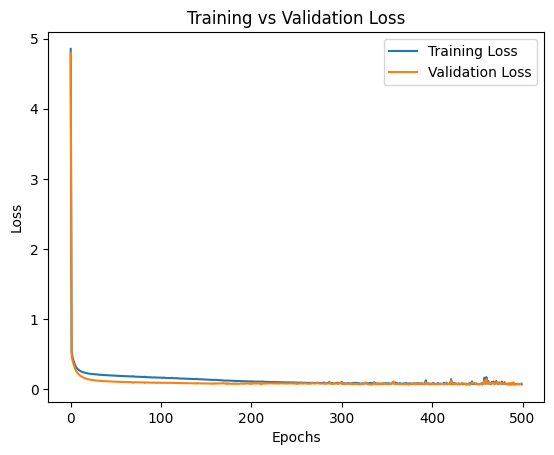

In [48]:
# Visualizing Training Loss and Validation Loss

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [49]:
######################
#    Solution Q1     #
######################

model = nn.Sequential(
    nn.Linear(30, 12),  # 30 input features, 12 hidden units
    nn.ReLU(),
    nn.Linear(12, 8),   # 12 input to 8 hidden units
    nn.ReLU(), 
    nn.Linear(8, 1),    # 8 input units to 1 output (binary classification)
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 500
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        ybatch = y_train[i:i+batch_size]
        y_pred = model(Xbatch)
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Record the training loss
    with torch.no_grad():
        y_pred_train = model(X_train)
        train_loss = loss_fn(y_pred_train, y_train).item()
        train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_val)
        val_loss = loss_fn(y_pred_val, y_val).item()
        val_losses.append(val_loss)
    
    #print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss}, Val Loss: {val_loss}')


**Solution:**

2. **Training Loss**: Will continue to decrease, suggesting that the model is fitting well on the training data.
   
    **Validation Loss**: Will decrease initially but will then start increasing, indicating that the model is not generalizing well and is overfitting the training data.

    **Accuracy**: The training accuracy may be very high, but the validation accuracy will start to drop after some point.

3. **Batch normalization**: helps to stabilize and accelerate training by normalizing the input of each layer to have a mean of 0 and variance of 1. This can lead to faster convergence and help prevent overfitting.

      - The nn.BatchNorm1d() layer normalizes the output from the previous layer.

      - This helps control internal covariate shifts and accelerates training by making optimization easier.
      
      - Batch normalization can improve generalization, especially in deep networks.
  

   **Dropout**: is a regularization technique that randomly "drops out" or ignores a subset of neurons during each training step. This prevents overfitting by forcing the model to be more robust.

       - Dropout helps to reduce overfitting by randomly setting a fraction of the input units to zero during training (p=0.5 means 50% of the units are dropped out).

       - Different probabilities (p) can be experimented with for different layers. Usually, a higher dropout rate is applied to earlier layers and lower rates to deeper layers.

   **Optimizers**:

       - SGD: Slow, but steady. Best for simpler problems or when you want fine-grained control over updates.

       - Adam: Fast convergence due to adaptive learning rates, but may require additional regularization to avoid overfitting.

       - RMSprop: Balances convergence and smoothness; good for noisy or complex loss surfaces.

       - AdaGrad: Works best for sparse data but may require extra tuning to prevent early stagnation.

In [ ]:
######################
#    Solution Q3     #
######################

#Batch normalization
model = nn.Sequential(
    nn.Linear(30, 12),  
    nn.BatchNorm1d(12),  # Add Batch Normalization after first layer
    nn.ReLU(),
    nn.Linear(12, 8),    
    nn.BatchNorm1d(8),   # Add Batch Normalization after second layer
    nn.ReLU(), 
    nn.Linear(8, 1),     
    nn.Sigmoid()
)

#Dropout
model = nn.Sequential(
    nn.Linear(30, 12),
    nn.ReLU(),
    nn.Dropout(p=0.5),  # Add Dropout layer with 50% probability
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Dropout(p=0.3),  # Add Dropout layer with 30% probability
    nn.Linear(8, 1),
    nn.Sigmoid()
)

#Optimizers
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)